In [15]:
import numpy as np

# np.random.seed(42)

# Sample 49 lambda values from Normal(0.5, 0.125)
lambda_vals = np.random.normal(loc=0.5, scale=0.125, size=49)

# E
E = 20
lambda_vals = lambda_vals * E

# Generate Poisson counts and make it a NumPy array
poisson_counts = np.array([np.random.poisson(lam) for lam in lambda_vals])



print(type(poisson_counts))  # should show <class 'numpy.ndarray'>
print(poisson_counts)


print(f'Poisson count sum: {poisson_counts.sum()}')

<class 'numpy.ndarray'>
[ 9 16 14 10 13  8 11  6 11 10  9  1 17 13  8 16  6 22 12  5 11  8 10  8
 12 10  9  6  7 14  4 11 12  8  9 18  9  6 10  9  7  9 12 19 11 10 11  2
 11]
Poisson count sum: 500


Mean of sum of counts: 489.62
Std of sum of counts:  21.59


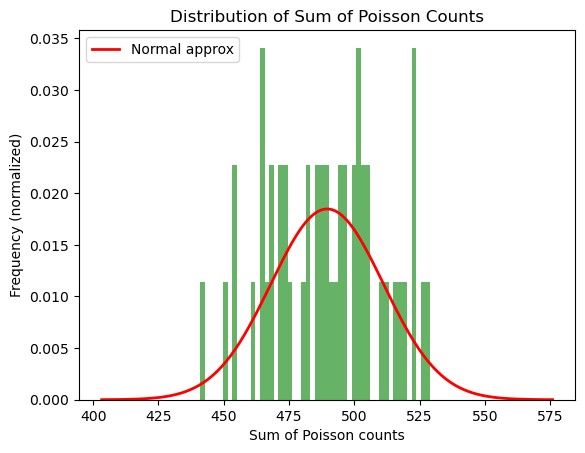

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

random_seed = 42
np.random.seed(random_seed)

# Number of times to repeat the entire sampling process
N_repeats = 50

# Store the sum of Poisson counts in each iteration
sum_of_counts = []

for _ in range(N_repeats):
    # Sample 49 lambda values from Normal(0.5, 0.125)
    lambda_vals = np.random.normal(loc=0.5, scale=0.125, size=49)

    # Multiply by E = 20
    lambda_vals *= 20
    lambda_vals = np.clip(lambda_vals, a_min=0, a_max=None)

    # print(lambda_vals)
    
    # Generate Poisson counts for each lambda
    poisson_counts = [np.random.poisson(lam) for lam in lambda_vals]
    
    # Append the sum of counts for this iteration
    sum_of_counts.append(sum(poisson_counts))

sum_of_counts = np.array(sum_of_counts)

# ---- Analyze and plot the distribution of the sums ----

# Basic statistics
mean_sum = np.mean(sum_of_counts)
std_sum  = np.std(sum_of_counts)

print(f"Mean of sum of counts: {mean_sum:.2f}")
print(f"Std of sum of counts:  {std_sum:.2f}")

# Plot the histogram of the sums
plt.hist(sum_of_counts, bins=50, density=True, alpha=0.6, color='g')

# Plot the theoretical normal curve using the sample mean and std
x = np.linspace(mean_sum - 4*std_sum, mean_sum + 4*std_sum, 200)
pdf = norm.pdf(x, loc=mean_sum, scale=std_sum)
plt.plot(x, pdf, 'r-', lw=2, label='Normal approx')

plt.title("Distribution of Sum of Poisson Counts")
plt.xlabel("Sum of Poisson counts")
plt.ylabel("Frequency (normalized)")
plt.legend()
plt.show()


In [19]:
np.random.poisson(0)

0